# Etapa 1 - Carregamento e pré-processamento:

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Caminho para o diretório das imagens
caminho_dataset = 'imagens-iris/'

# Criar gerador de dados para treino e validação
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalizar os pixels para 0-1
    validation_split=0.2,    # 80% treino, 20% validação
    rotation_range=20,       # Pequenas rotações aleatórias
    zoom_range=0.2,          # Pequenos zooms aleatórios
    horizontal_flip=True     # Permitir espelhamento horizontal
)

# Gerador de treino
train_generator = datagen.flow_from_directory(
    caminho_dataset,
    target_size=(128, 128),  # Redimensionar para 128x128
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Gerador de validação
val_generator = datagen.flow_from_directory(
    caminho_dataset,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 120 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


# Etapa 2 - Construção do Modelo CNN:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Construindo o modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Evitar overfitting
    Dense(3, activation='softmax')  # Três classes
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Visualizar resumo do modelo
model.summary()


C:\Users\0o0ni\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

# Etapa 3 - Treinamento do modelo:

In [3]:
# Treinar o modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15  # Podemos ajustar depois se quiser
)


C:\Users\0o0ni\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 572ms/step - accuracy: 0.3543 - loss: 2.8883 - val_accuracy: 0.4828 - val_loss: 1.0927
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.3803 - loss: 1.1033 - val_accuracy: 0.3103 - val_loss: 1.0992
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.3654 - loss: 1.0776 - val_accuracy: 0.2759 - val_loss: 1.1095
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.4435 - loss: 1.0365 - val_accuracy: 0.2414 - val_loss: 1.1510
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.4582 - loss: 1.0357 - val_accuracy: 0.2759 - val_loss: 1.0931
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.5430 - loss: 0.9834 - val_accuracy: 0.2759 - val_loss: 1.1850
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.5113 - loss: 0.9925 - val_accuracy: 0.4483 - val_loss: 1.0739
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.5528 - loss: 0.9731 - val_accuracy: 0.2759 - val_loss:

# Etapa 4 - Plotando os Gráficos de Acurácia e Perda (Loss):

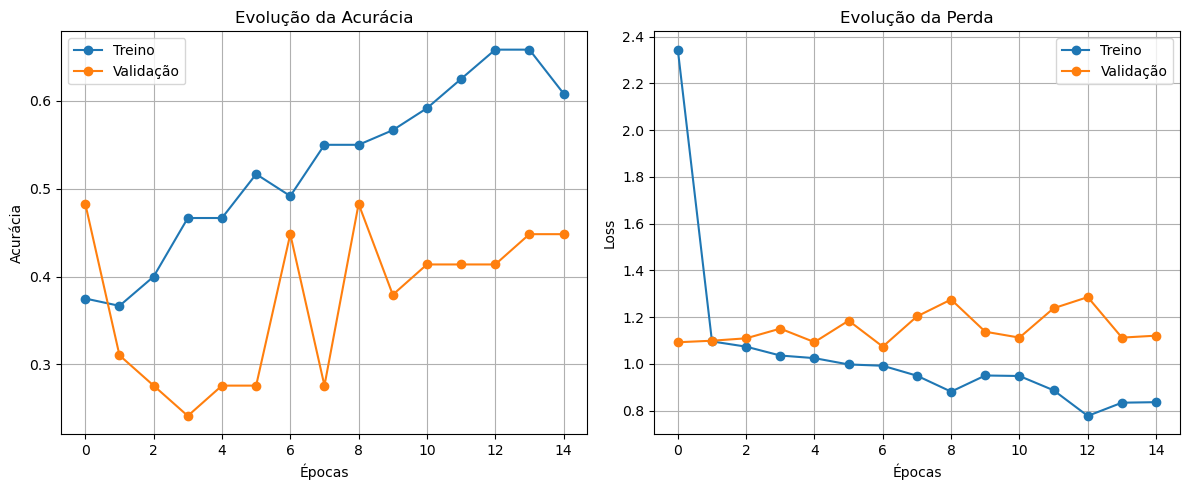

In [4]:
import matplotlib.pyplot as plt

# Plotando a acurácia de treino e validação
plt.figure(figsize=(12, 5))

# Subplot 1 - Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino', marker='o')
plt.plot(history.history['val_accuracy'], label='Validação', marker='o')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Subplot 2 - Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino', marker='o')
plt.plot(history.history['val_loss'], label='Validação', marker='o')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Etapa 5 - Gerando a Matriz de Confusão:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


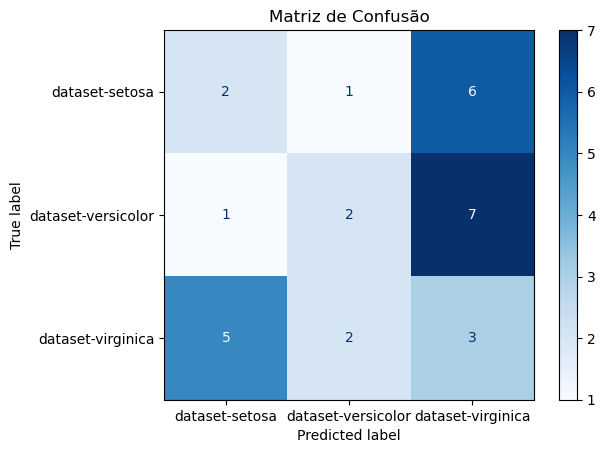

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Primeiro, gerar previsões no conjunto de validação
val_generator.reset()  # Garante que começamos do início
preds = model.predict(val_generator)

# Transformar as previsões de one-hot para índices
y_pred = np.argmax(preds, axis=1)

# Pegar os rótulos reais do conjunto de validação
y_true = val_generator.classes

# Gerar a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Mostrar a matriz de confusão
labels = list(val_generator.class_indices.keys())  # Pega os nomes das classes automaticamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()


## Explicação do que acontece na célula acima:

    model.predict(val_generator): o modelo prevê as classes para as imagens de validação.

    np.argmax: transforma as previsões (que são probabilidades) no índice da classe mais provável.

    confusion_matrix: compara previsões (y_pred) com valores reais (y_true).

    ConfusionMatrixDisplay: gera uma imagem bonita da matriz de confusão, mostrando corretamente Setosa, Versicolor e Virginica.

# Etapa 6 - Salvando o modelo:

In [6]:
# Salvar o modelo treinado
model.save('modelo_iris_scan.h5')

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


# Etapa 7 - Criando o app de Scan para PC (Streamlit)

In [7]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Carregar o modelo treinado
model = load_model('modelo_iris_scan.h5')

# Classes (ordem deve bater com o treinamento)
classes = ['iris-setosa', 'iris-versicolor', 'iris-virginica']

# Título do app
st.title('IrisScan 🌸 - Classificador de Flores Iris')

# Upload da imagem
uploaded_file = st.file_uploader("Faça upload de uma imagem de flor Iris...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(128, 128))
    st.image(img, caption='Imagem enviada.', use_column_width=True)

    # Pré-processar imagem
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Fazer predição
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]

    # Mostrar o resultado
    st.subheader('Predição:')
    st.write(f'A flor é provavelmente: **{predicted_class}** 🌸')


2025-04-27 19:40:21.248 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.109 
  command:

    streamlit run C:\Users\0o0ni\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-27 19:40:22.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-27 19:40:22.115 Thread 'MainThread': mi